# **Project 1: Laptop Price Predictor**

# **Data Loading**

***Pandas*** : *Pandas is a Python library used for data manipulation and analysis, particularly for handling structured data like tables and time series.*

***Seaborn*** : *Seaborn is a statistical data visualization library in Python, providing a high-level interface for creating attractive and informative statistical graphics.*

***Numpy*** : *Numpy is a powerful library in Python for numerical computing, offering support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions.*

***Matplotlib*** : *Matplotlib is a comprehensive plotting library in Python, enabling the creation of static, interactive, and animated visualizations with a wide range of plotting functions and customization options.*

***Plotly Express*** :  *is a high-level Python visualization library that simplifies the creation of interactive, publication-quality plots with minimal code.*

**This line of code imports essential data manipulation libraries (Pandas and NumPy), visualization libraries (Seaborn and Matplotlib), and sets Matplotlib to display plots inline.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib_inline
import warnings
import plotly.express as px

**The "warnings.simplefilter("ignore")" command suppresses the display of all warnings generated by the Python code.**

In [ ]:
warnings.simplefilter("ignore")

**The code loads a CSV file named "laptop_data.csv" into a DataFrame using Pandas and displays the first few rows of the DataFrame using the "head()" function.**

In [ ]:
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


**This code retrieves and displays the column labels of the DataFrame stored in the variable "df".**

In [ ]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

**This code calculates and displays the number of missing values (null values) in each column of the DataFrame "df".**

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


**In one line, df.duplicated().sum() means it calculates the total number of duplicate rows in the DataFrame df.**

In [ ]:
df.duplicated().sum()

np.int64(0)

**df.info() provides a concise summary of a DataFrame, including its index dtype and column dtypes, non-null values, and memory usage.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


**This code identifies and assigns categorical variables (stored in "catvars") and numerical variables (stored in "numvars") by selecting columns of specific data types from the DataFrame "df", respectively.**

In [ ]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Unnamed: 0', 'Inches', 'Price'], dtype='object'))

**Displaying all the unique values in the "TypeName" column.**

In [ ]:
df["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

**Displaying all the unique values in the "OpSys" column.**

In [ ]:
df["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

**This code removes the units ('GB' from 'Ram' and 'kg' from 'Weight') from the respective columns and converts the data type of 'Ram' to integer ("int32") and 'Weight' to float ("float32"). Then, it displays the first few rows of the modified DataFrame.**

In [ ]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


**"df.info()" provides a concise summary of the DataFrame, including the data types of each column and the number of non-null values.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(7)
memory usage: 112.1+ KB


# **Exploratory Data Analysis And Data Visualization**

**This code creates a seaborn histogram plot (sns.histplot) for the 'Price' column of the DataFrame "df", visualizing the distribution of prices with the specified color 'red'.**

**This plot depicts the count of prices.**

<Axes: xlabel='Price', ylabel='Count'>

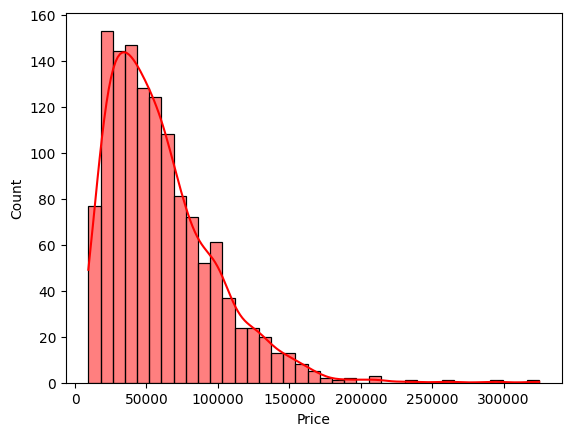

In [ ]:
sn.histplot(df['Price'],color='red', kde=True)

**This code creates a seaborn countplot of 'Company' from DataFrame 'df', with companies as y-axis labels, using an autumn color palette. The x-axis labels are rotated vertically for better readability.**

**This graph illustrates the count of laptops categorized by company.**

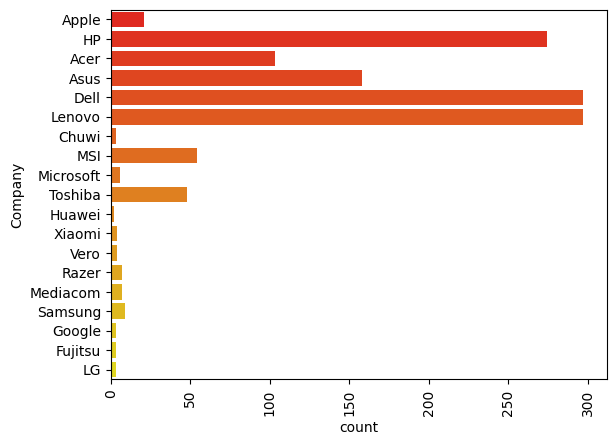

In [ ]:
sn.countplot(y=df['Company'], hue=df['Company'], palette='autumn', legend=False)
plt.xticks(rotation='vertical')
plt.show()

**This code generates a seaborn countplot for 'TypeName' from DataFrame 'df', displaying type names as y-axis labels with a deep color palette. The x-axis labels are rotated vertically for better visualization.**

**This graph displays the count of laptop types (TypeName).**

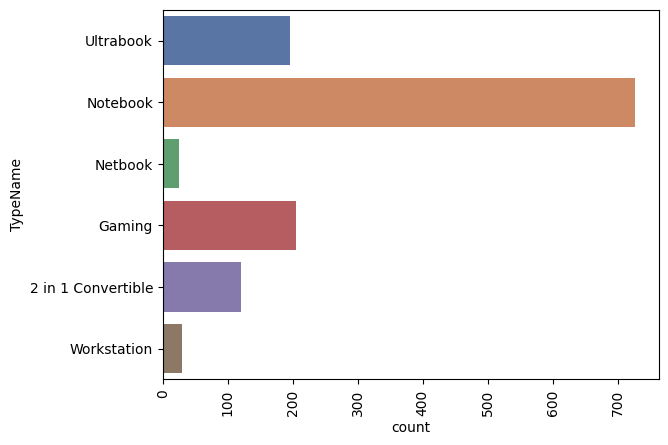

In [ ]:
sn.countplot(y=df['TypeName'], hue=df['TypeName'], palette='deep', legend=False)
plt.xticks(rotation='vertical')
plt.show()

**This code creates a seaborn countplot for 'OpSys' from DataFrame 'df', showing operating systems as y-axis labels with a muted color palette. The x-axis labels are rotated vertically for improved presentation.**

**This graph illustrates the count of operating systems.**

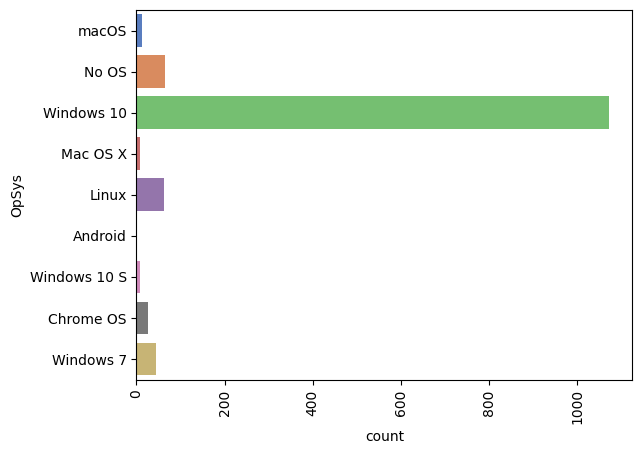

In [ ]:
sn.countplot(y=df['OpSys'], hue=df['OpSys'], palette='muted', legend=False)
plt.xticks(rotation='vertical')
plt.show()

**This code generates a seaborn countplot for 'Ram' from DataFrame 'df', displaying RAM sizes as y-axis labels with a pastel color palette. The x-axis labels are rotated vertically for clearer display.**

**This graph presents the count of RAM configurations.**

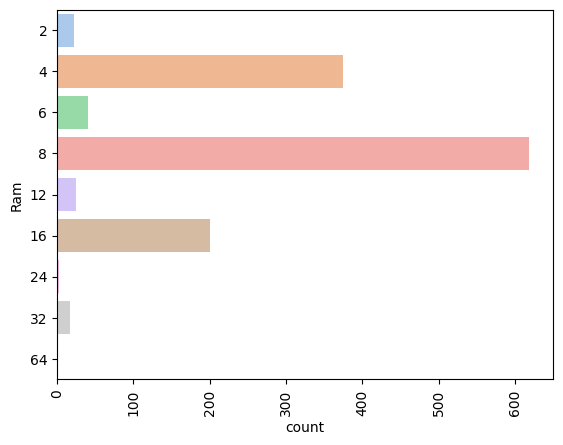

In [ ]:
sn.countplot(y=df['Ram'], hue=df['Ram'], palette='pastel', legend=False)
plt.xticks(rotation='vertical')
plt.show()

**This code uses Seaborn's 'barplot' to show the average price ('Price') for each unique 'Company' in DataFrame 'df', with a figure size of (15,7), vertically rotated x-axis labels, and 'blue' color for bars, then displays the plot.**

In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


**The code creates a DataFrame "df" with company names and their corresponding prices, then uses Plotly Express to generate and display a horizontal bar plot showing company prices. The plot is customized with a specified width, height, and title.**

**This graph compares laptop prices based on the company.**

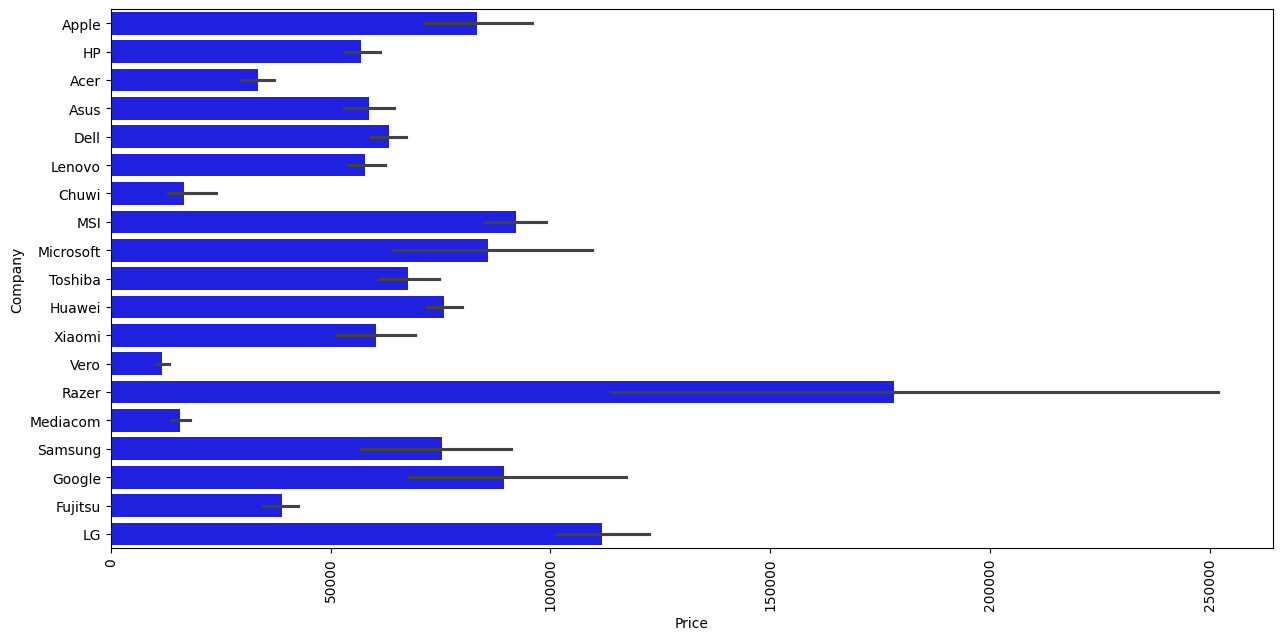

In [ ]:
plt.figure(figsize=(15,7))
sn.barplot(y=df['Company'], x=df['Price'], color='blue')
plt.xticks(rotation='vertical')
plt.show()

**The Count Plot shows frequency distribution with 'autumn' color palette.**

**This graph gives a count of each TypeName.**

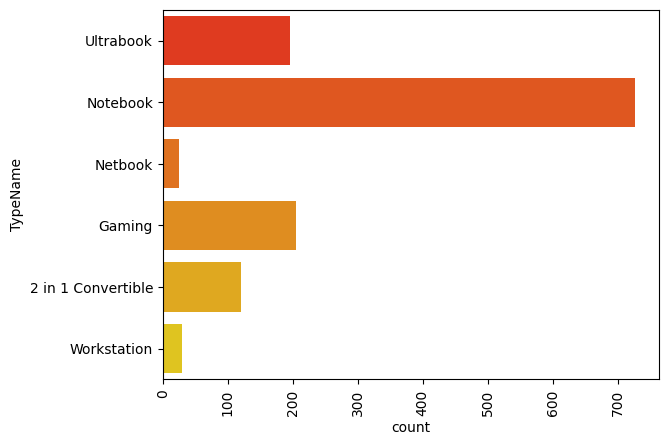

In [ ]:
sn.countplot(y=df['TypeName'], hue=df['TypeName'], palette='autumn', legend=False)
plt.xticks(rotation='vertical')
plt.show()

**Bar Plot illustrates average prices across laptop types.**

**This graph compares prices across different laptop types (TypeNames).**

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000'),
  Text(140000.0, 0, '140000'),
  Text(160000.0, 0, '160000')])

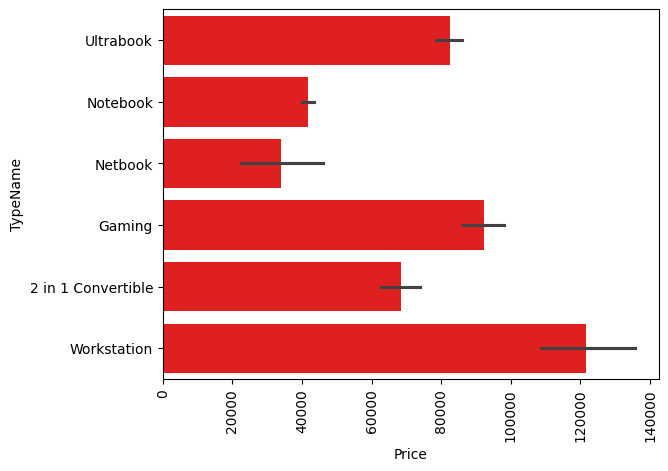

In [ ]:
sn.barplot(y = df['TypeName'],x = df['Price'], color="red")
plt.xticks(rotation = 'vertical')

**Scatter Plot reveals relationship between screen size and prices.**

**This graph compares prices against screen sizes (inches).**

<Axes: xlabel='Inches', ylabel='Price'>

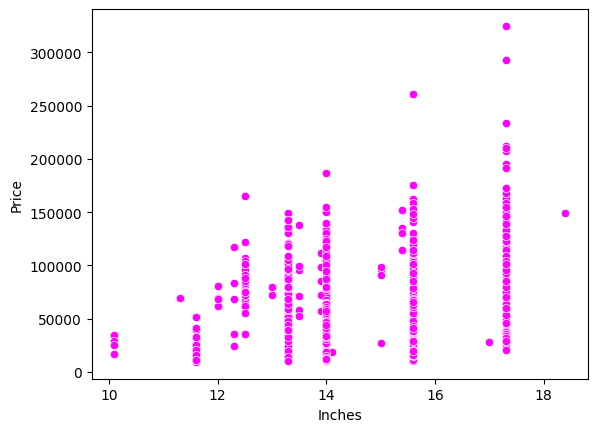

In [ ]:
sn.scatterplot(x = df['Inches'],y = df['Price'], color="magenta")

**The value counts provide insight into the distribution of screen resolutions.**


In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


**The value counts provide insight into the distribution of screen resolutions.**

In [ ]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1
                                                      if 'Touchscreen' in element else 0)
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


**Sampling and displaying 5 rows showcase the TouchScreen column's inclusion.**

In [ ]:
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1202,1202,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2.00,68464.80,1
111,111,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.12,1
1110,1110,HP,Notebook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core M 6Y54 1.1GHz,8,256GB SSD,Intel HD Graphics 515,Windows 10,1.16,90522.72,1
159,159,Toshiba,Notebook,15.6,1366x768,Intel Core i3 6006U 2.2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,23816.16,0
134,134,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.05,31861.44,0


**The Count Plot visualizes the distribution of touchscreen presence using a plasma color palette.**

**Here 0 means does not have TouchScreen.**

**And 1 mean does has TouchScreen.**

**This graph compares the presence of touchscreen functionality against their count.**

<Axes: xlabel='count', ylabel='TouchScreen'>

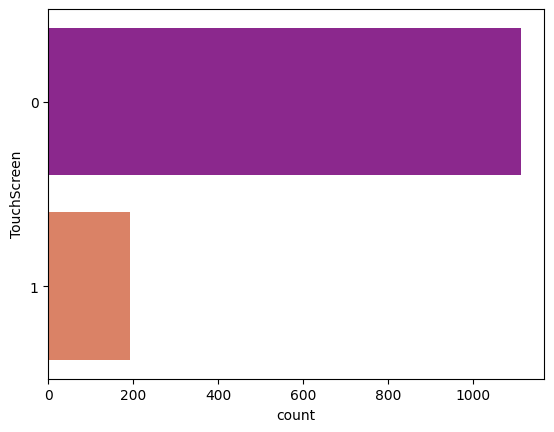

In [ ]:
sn.countplot(y=df['TouchScreen'],palette='plasma',  hue=df['TouchScreen'], legend=False)

**Bar plot showcases price distribution based on touchscreen presence.**

**1 means TouchScreen Is Present.**

**0 means TouchScreen is not present.**

**This graph compares prices based on the presence of touchscreen functionality.**

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

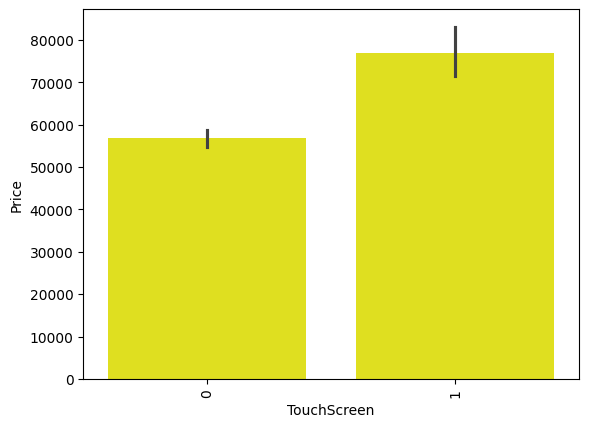

In [ ]:
sn.barplot(x = df['TouchScreen'],y = df['Price'], color="yellow")
plt.xticks(rotation = 'vertical')

**Creation of 'IPS' column flags laptops with IPS screen technology.Sampling 5 rows displays the IPS column's inclusion.**

In [ ]:
df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0)
df.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
771,771,Samsung,2 in 1 Convertible,15.0,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon 540,Windows 10,1.71,95850.72,1,0
222,222,Toshiba,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.20,72620.64,0,0
1066,1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.00,0,1
318,318,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,52214.40,0,0
68,68,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.90,29250.72,0,0


**Subsequent count plot illustrates distribution of IPS screen availability.**

**0 means IPS is not present.**

**1 means IPS is present.**

**This graph compares the count of laptops with IPS (In-Plane Switching) displays against those without.**

<Axes: xlabel='IPS', ylabel='count'>

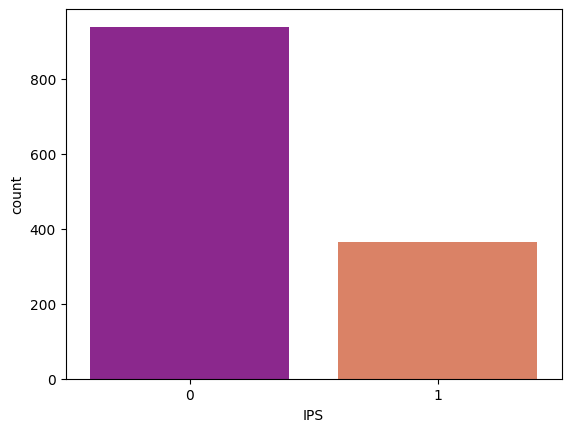

In [ ]:
sn.countplot(x=df['IPS'],palette='plasma', hue=df['IPS'], legend=False)

# **Extracting The X Resolution And The Y Resolution**

**Splitting the 'ScreenResolution' column into X and Y resolutions.**


In [ ]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


**Creation of 'X_res' and 'Y_res' columns for X and Y resolutions.**

**We are doing this to split the string and integer values in the "ScreenResolution" column for more effective preprocessing.**

In [ ]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


**Cleaning X resolution column by removing commas and extracting numerical values.**

In [ ]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


**Converting X and Y resolution columns to integer data type for analysis.**

In [ ]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
 12  TouchScreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  X_res             1303 non-null   int64  
 15  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64

**Heatmap visualizes correlations between numerical features, with only numerical columns included in the correlation calculation. The correlations are represented using a plasma color map for enhanced visualization.**

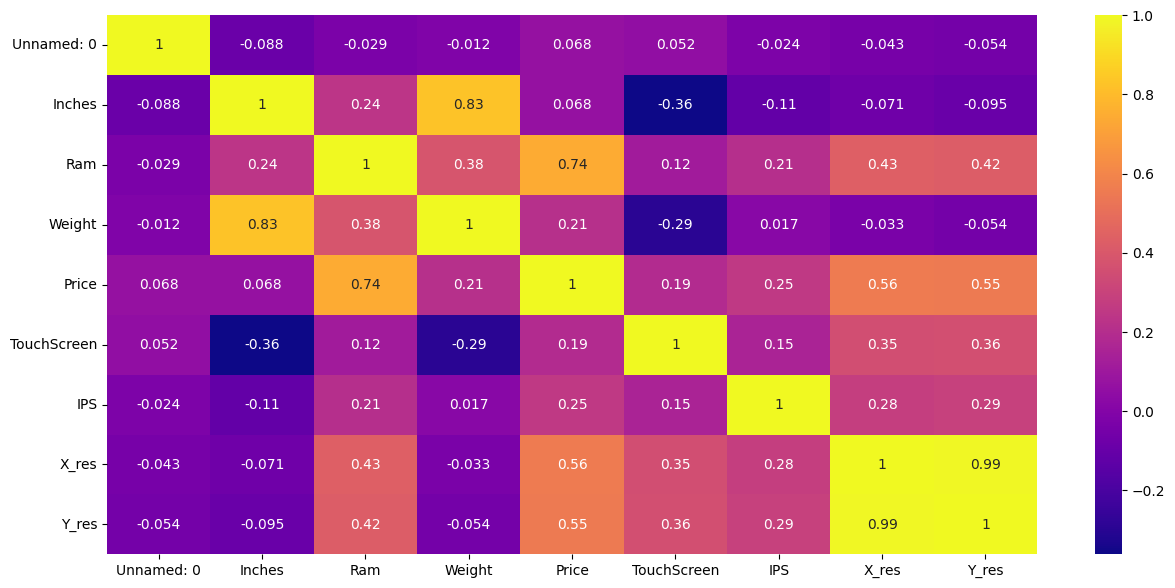

In [ ]:
numerical_df = df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(15,7))
sn.heatmap(numerical_df.corr(), annot=True, cmap='plasma')
plt.show()

**numeric_columns: is a list containing the names of numeric columns in the DataFrame, including 'Inches', 'Ram', 'Weight', and 'Price'.**

**correlation calculates the correlation between these numeric columns and the 'Price' column, using the corr() method. The result is a Series object containing correlation coefficients, with 'Price' as the index.**

**print(correlation) displays the correlation coefficients between the numeric columns and the 'Price' column.**

**We are using these features because they are highly correlated with the target variable, 'Price' as indicated by the heatmap.**

In [ ]:
numeric_columns = ["Inches", "Ram", "Weight", "Price", "X_res", "Y_res", "TouchScreen", "IPS"]
correlation = df[numeric_columns].corr()['Price']
print(correlation)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
X_res          0.556529
Y_res          0.552809
TouchScreen    0.191226
IPS            0.252208
Name: Price, dtype: float64


**The first line calculates the Pixels Per Inch (PPI) of a display and assigns it to a new column 'PPI' in the DataFrame df.**

**The second line displays the first few rows of the DataFrame df to inspect the changes made after the PPI calculation.**

In [ ]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


**The code drops the columns 'ScreenResolution', 'Inches', 'X_res', and 'Y_res' from the DataFrame df in place.**

**It then displays the first few rows of the modified DataFrame df to inspect the changes made.**

In [ ]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res', 'Unnamed: 0'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


**It shows the all the unique categories present in the column in "Company".**

In [ ]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

**The provided code converts the categorical variable "Company" into dummy variables, concatenates them with the original DataFrame, and then drops the original "Company" column, resulting in a DataFrame with dummy variables representing the different companies.**

In [ ]:
df = pd.concat([df, pd.get_dummies(df["Company"]).astype(int)], axis=1)
df = df.drop(columns=["Company"])
df.head(5)

,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,0,0,0,0


**This command displays all the unique categories in the columns "TypeName".**

In [ ]:
df["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

**The provided code converts the categorical variable "Company" into dummy variables, concatenates them with the original DataFrame, and then drops the original "Company" column, resulting in a DataFrame with dummy variables representing the different companies.**

In [ ]:
df = pd.concat([df, pd.get_dummies(df["TypeName"]).astype(int)], axis=1)
df = df.drop(columns=["TypeName"])
df.head(5)

,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,...,0,0,0,0,0,0,0,0,1,0
1,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,...,0,0,0,0,0,0,0,0,1,0
2,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,...,0,0,0,0,0,0,0,1,0,0
3,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,...,0,0,0,0,0,0,0,0,1,0
4,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,...,0,0,0,0,0,0,0,0,1,0


**Displays all the unique categories present in the columns "OpSys".**

In [ ]:
df["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

**This sequence of operations effectively converts the categorical variable "OpSys" into dummy variables and integrates them into the DataFrame while removing the original column.**


In [ ]:
df = pd.concat([df, pd.get_dummies(df["OpSys"]).astype(int)], axis=1)
df = df.drop(columns=["OpSys"])
df.head(5)

,Cpu,Ram,Memory,Gpu,Weight,Price,TouchScreen,IPS,PPI,Acer,...,Workstation,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,0,...,0,0,0,0,0,0,0,0,0,1
1,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,0,...,0,0,0,0,0,0,0,0,0,1
2,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,141.211998,0,...,0,0,0,0,0,1,0,0,0,0
3,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,220.534624,0,...,0,0,0,0,0,0,0,0,0,1
4,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,226.983005,0,...,0,0,0,0,0,0,0,0,0,1


**Displays all the unique categories present in the columns "Cpu".**

In [ ]:
df["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

**The code processes the "Cpu" column of the DataFrame by categorizing processor types. It categorizes Intel Core i7, i5, and i3 processors separately, considers other Intel processors as 'Other Intel Processor', and categorizes any non-Intel processors as 'AMD Processor'.**

In [ ]:
def processortype(text):

    intel_processors = {'Intel Core i7', 'Intel Core i5', 'Intel Core i3'}

    if text in intel_processors:
        return text

    elif text.startswith('Intel'):
        return 'Other Intel Processor'

    else:
        return 'AMD Processor'

df['Cpu'] = df['Cpu'].apply(processortype)
df.head()

,Cpu,Ram,Memory,Gpu,Weight,Price,TouchScreen,IPS,PPI,Acer,...,Workstation,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,Other Intel Processor,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,0,...,0,0,0,0,0,0,0,0,0,1
1,Other Intel Processor,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,0,...,0,0,0,0,0,0,0,0,0,1
2,Other Intel Processor,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,141.211998,0,...,0,0,0,0,0,1,0,0,0,0
3,Other Intel Processor,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,220.534624,0,...,0,0,0,0,0,0,0,0,0,1
4,Other Intel Processor,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,226.983005,0,...,0,0,0,0,0,0,0,0,0,1


**After Preprocessing it again displays all the unique categories present in the columns "Cpu".**

In [ ]:
df["Cpu"].unique()

array(['Other Intel Processor', 'AMD Processor'], dtype=object)

**This sequence of operations effectively converts the categorical variable "Cpu" into dummy variables and integrates them into the DataFrame while removing the original column.**

In [ ]:
df = pd.concat([df, pd.get_dummies(df["Cpu"]).astype(int)], axis=1)
df = df.drop(columns=["Cpu"])
df.head(5)

,Ram,Memory,Gpu,Weight,Price,TouchScreen,IPS,PPI,Acer,Apple,...,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD Processor,Other Intel Processor
0,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,0,1,...,0,0,0,0,0,0,0,1,0,1
1,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,0,1,...,0,0,0,0,0,0,0,1,0,1
2,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,141.211998,0,0,...,0,0,0,1,0,0,0,0,0,1
3,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,220.534624,0,1,...,0,0,0,0,0,0,0,1,0,1
4,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,226.983005,0,1,...,0,0,0,0,0,0,0,1,0,1


# **Analysis On The RAM Column**

**Count plot displays the distribution of RAM capacities using an 'autumn' color palette.**

**This graph illustrates the count of laptops based on RAM configurations.**

<Axes: xlabel='count', ylabel='Ram'>

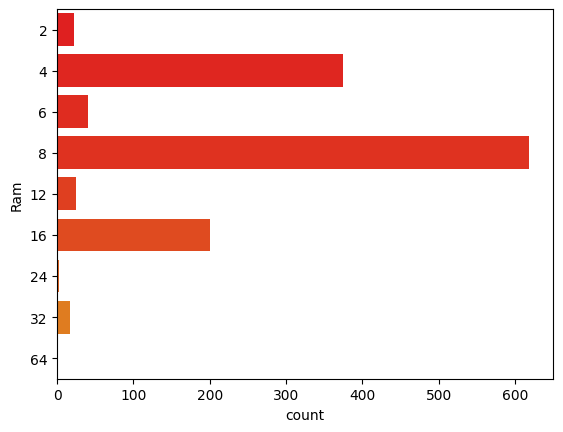

In [ ]:
sn.countplot(y=df['Ram'],palette='autumn', hue=df["Ram"], legend=False)

**Bar plot illustrates the relationship between RAM capacity and laptop prices.**

**This graph compares RAM configurations with prices.**

<Axes: xlabel='Ram', ylabel='Price'>

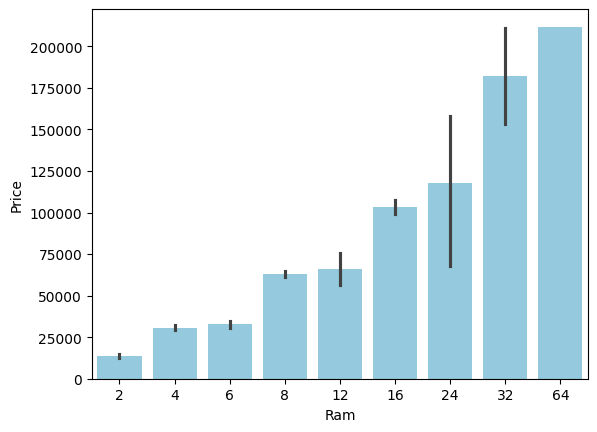

In [ ]:
sn.barplot(x='Ram', y='Price', data=df, color="skyblue")

# **About The Memory Column**

**"*We will separate the type of memory from its corresponding value, much like what was done in the preceding section. Since this process involves multiple steps, we're dealing with memory in distinct dimensions, such as 128GB SSD + 1TB HDD. To unify them into a single dimension, we've made the necessary adjustments outlined below.*"**

**Extracting the first entry from the 'Memory' column to understand memory types.**

In [ ]:
df['Memory'].iloc[:1][0]

'128GB SSD'

**Counting the frequency of each memory type.**

In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


**Cleaning and formatting memory entries to remove units ('GB' and 'TB') and split into primary and secondary memory components.**

In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
newdf = df['Memory'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


**Splitting memory entries into primary and secondary memory components.**

In [ ]:
df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Ram,Memory,Gpu,Weight,Price,TouchScreen,IPS,PPI,Acer,Apple,...,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD Processor,Other Intel Processor,first
0,8,128 SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,0,1,...,0,0,0,0,0,0,1,0,1,128 SSD
1,8,128 Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,0,1,...,0,0,0,0,0,0,1,0,1,128 Flash Storage
2,8,256 SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,141.211998,0,0,...,0,0,1,0,0,0,0,0,1,256 SSD
3,16,512 SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,220.534624,0,1,...,0,0,0,0,0,0,1,0,1,512 SSD
4,8,256 SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,226.983005,0,1,...,0,0,0,0,0,0,1,0,1,256 SSD


**Defining functions to create binary columns indicating the presence of specific memory types in primary and secondary memory.**

In [ ]:
def applychanges(value):

    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)

listtoapply = ['HDD','SSD','Hybrid','FlashStorage']
for value in listtoapply:
    applychanges(value)

df.head()

,Ram,Memory,Gpu,Weight,Price,TouchScreen,IPS,PPI,Acer,Apple,...,Windows 10 S,Windows 7,macOS,AMD Processor,Other Intel Processor,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,8,128 SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,0,1,...,0,0,1,0,1,128 SSD,0,1,0,0
1,8,128 Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,0,1,...,0,0,1,0,1,128 Flash Storage,0,0,0,0
2,8,256 SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,141.211998,0,0,...,0,0,0,0,1,256 SSD,0,1,0,0
3,16,512 SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,220.534624,0,1,...,0,0,1,0,1,512 SSD,0,1,0,0
4,8,256 SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,226.983005,0,1,...,0,0,1,0,1,256 SSD,0,1,0,0


**Extracting numerical values from memory entries to facilitate analysis.**

In [ ]:
df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

,count
first,
256 SSD,500
1000 HDD,225
128 SSD,172
512 SSD,138
500 HDD,132
32 Flash Storage,38
64 Flash Storage,16
2000 HDD,16
1000 SSD,16


**Assigning the secondary memory component to the 'Second' column.**

In [ ]:
df['Second'] = newdf[1]
df.head()

,Ram,Memory,Gpu,Weight,Price,TouchScreen,IPS,PPI,Acer,Apple,...,Windows 7,macOS,AMD Processor,Other Intel Processor,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,8,128 SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,0,1,...,0,1,0,1,128 SSD,0,1,0,0,None
1,8,128 Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,0,1,...,0,1,0,1,128 Flash Storage,0,0,0,0,None
2,8,256 SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,141.211998,0,0,...,0,0,0,1,256 SSD,0,1,0,0,None
3,16,512 SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,220.534624,0,1,...,0,1,0,1,512 SSD,0,1,0,0,None
4,8,256 SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,226.983005,0,1,...,0,1,0,1,256 SSD,0,1,0,0,None


**Defining a function to create binary columns indicating the presence of specific memory types in the secondary memory.**

In [ ]:
def applychanges1(value):

    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)

listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)

df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

,count
Second,
0,1095
1000 HDD,185
2000 HDD,15
256 SSD,3
500 HDD,2
1000 Hybrid,2
512 SSD,1


**Handling missing values by filling them with "0" and extracting numerical values from memory entries.**

In [ ]:
df['first'] = df['first'].str.extract('(\d+)').astype('int')
df['Second'] = df['Second'].str.extract('(\d+)').astype('int')
df.head(5)

,Ram,Memory,Gpu,Weight,Price,TouchScreen,IPS,PPI,Acer,Apple,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,8,128 SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,0,1,...,128,0,1,0,0,0,0,0,0,0
1,8,128 Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,0,1,...,128,0,0,0,0,0,0,0,0,0
2,8,256 SSD,Intel HD Graphics 620,1.86,30636.0000,0,0,141.211998,0,0,...,256,0,1,0,0,0,0,0,0,0
3,16,512 SSD,AMD Radeon Pro 455,1.83,135195.3360,0,1,220.534624,0,1,...,512,0,1,0,0,0,0,0,0,0
4,8,256 SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,226.983005,0,1,...,256,0,1,0,0,0,0,0,0,0


**Calculating secondary memory capacities for HDD and SSD types. Dropping unnecessary columns related to memory processing after feature engineering.**

In [ ]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])

df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

**Displaying a sample of 5 rows to examine the dataset.**

In [ ]:
df.sample(5)

,Ram,Memory,Gpu,Weight,Price,TouchScreen,IPS,PPI,Acer,Apple,...,Windows 10,Windows 10 S,Windows 7,macOS,AMD Processor,Other Intel Processor,HDD,SSD,Hybrid,Flash_Storage
313,8,256 SSD,AMD Radeon R5,2.23,24988.32,0,0,141.211998,1,0,...,1,0,0,0,1,0,0,256,0,0
63,8,256 SSD,Intel UHD Graphics 620,1.40,50136.48,0,0,157.350512,0,0,...,1,0,0,0,0,1,0,256,0,0
1301,6,1000 HDD,AMD Radeon R5 M330,2.19,40705.92,0,0,100.454670,0,0,...,1,0,0,0,0,1,1000,0,0,0
1177,16,512 SSD,Nvidia GeForce GTX 960,3.31,69530.40,0,1,141.211998,0,0,...,1,0,0,0,0,1,0,512,0,0
591,12,512 SSD,AMD Radeon 530,2.20,50562.72,0,0,141.211998,0,0,...,1,0,0,0,1,0,0,512,0,0


**Removing the 'Memory' column as it's no longer needed for analysis.Displaying another sample of 5 rows after dropping the 'Memory' column.**

In [ ]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Ram,Gpu,Weight,Price,TouchScreen,IPS,PPI,Acer,Apple,Asus,...,Windows 10,Windows 10 S,Windows 7,macOS,AMD Processor,Other Intel Processor,HDD,SSD,Hybrid,Flash_Storage
1081,32,Nvidia GeForce GTX 980M,4.60,172627.2000,0,1,127.335675,0,0,0,...,1,0,0,0,0,1,0,512,1000,0
1079,4,Intel HD Graphics 520,2.31,50083.2000,0,0,141.211998,0,0,0,...,0,0,1,0,0,1,500,0,0,0
1227,4,Intel HD Graphics 520,2.18,27804.7008,0,0,100.454670,0,0,0,...,0,0,0,0,0,1,1000,0,0,0
1223,8,Intel HD Graphics 520,1.26,91288.3536,1,0,176.232574,0,0,0,...,0,0,1,0,0,1,0,256,0,0
296,8,Nvidia GeForce GTX 1050 Ti,2.50,52161.1200,0,0,141.211998,1,0,0,...,0,0,0,0,0,1,0,256,0,0


**Calculating correlations between features and prices to identify significant relationships and also tries to handle the errors gracefully.**

In [ ]:
numeric_columns = ["Ram", "Weight", "Price", "TouchScreen", "IPS", "PPI", "HDD", "SSD", "Hybrid", "Flash_Storage"]
correlation = df[numeric_columns].corr()['Price']
print(correlation)

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64


**"After examining the correlation, it's evident that 'Hybrid' and 'Flash Storage' show minimal association, suggesting they can be excluded from consideration. On the other hand, HDD and SSD demonstrate a significant correlation. Notably, HDD exhibits a negative correlation with price, which aligns with the trend in the market. As laptop prices rise, there's a higher likelihood of SSD usage over HDD, and vice versa."**

**Listing the columns of the refined dataset for further analysis.**

In [ ]:
df.columns

Index(['Ram', 'Gpu', 'Weight', 'Price', 'TouchScreen', 'IPS', 'PPI', 'Acer',
       'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei',
       'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung',
       'Toshiba', 'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook',
       'Notebook', 'Ultrabook', 'Workstation', 'Android', 'Chrome OS', 'Linux',
       'Mac OS X', 'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS',
       'AMD Processor', 'Other Intel Processor', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

**Dropping columns related to hybrid and flash storage as they're no longer required for analysis.Displaying the first few rows of the refined dataset.**

In [ ]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Ram,Gpu,Weight,Price,TouchScreen,IPS,PPI,Acer,Apple,Asus,...,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD Processor,Other Intel Processor,HDD,SSD
0,8,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,0,1,0,...,0,0,0,0,0,1,0,1,0,128
1,8,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,8,Intel HD Graphics 620,1.86,30636.0000,0,0,141.211998,0,0,0,...,0,1,0,0,0,0,0,1,0,256
3,16,AMD Radeon Pro 455,1.83,135195.3360,0,1,220.534624,0,1,0,...,0,0,0,0,0,1,0,1,0,512
4,8,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,226.983005,0,1,0,...,0,0,0,0,0,1,0,1,0,256


# **Analysis On GPU**

***Given the limited data available on laptops, it's more prudent to prioritize analyzing GPU brands over other accompanying values. Our focus will be directed towards identifying and evaluating the various brands involved*.**

**Determining the distribution of GPU brands based on the 'Gpu' column.**

In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


**Extracting the brand name of the GPU from the first word in each entry.**

In [ ]:
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


**Visualizing the distribution of GPU brands using a count plot with a 'plasma' color palette.**

**This graph compares GPU brands with their respective counts.**

<Axes: xlabel='count', ylabel='Gpu brand'>

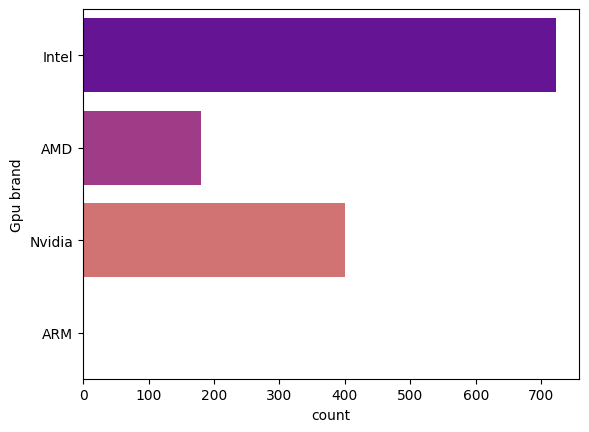

In [ ]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sn.countplot(df['Gpu brand'],palette='plasma')

**Removing entries with 'ARM' as the GPU brand due to their uniqueness.**

**This graph compares GPU brands with their respective counts.**

<Axes: xlabel='count', ylabel='Gpu brand'>

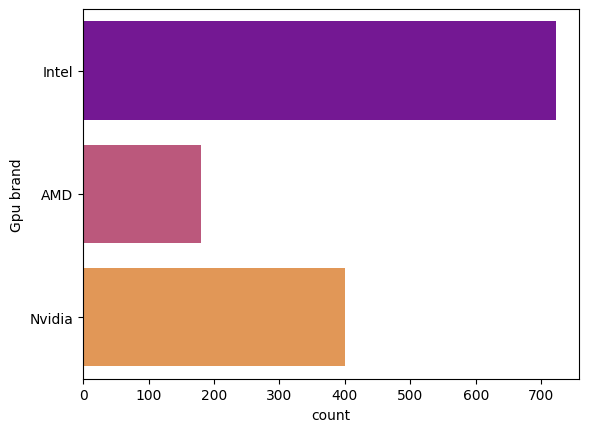

In [ ]:
df = df[df['Gpu brand']!='ARM']
sn.countplot(df['Gpu brand'],palette='plasma')

**Revisualizing the distribution of GPU brands after removing 'ARM' entries.  Analyzing the median prices of laptops based on GPU brands using a bar plot.**

**This graph compares the prices of GPU brands.**

<Axes: xlabel='Gpu brand', ylabel='Price'>

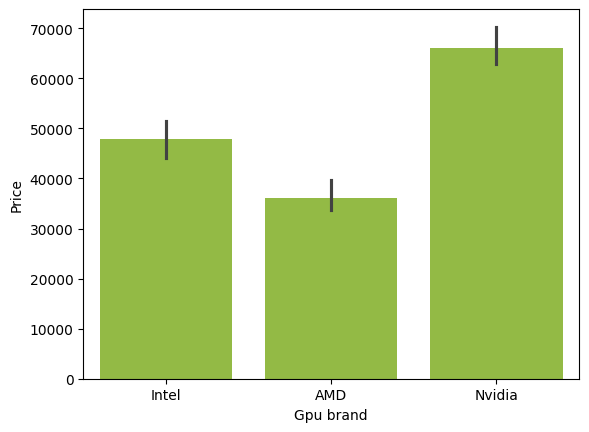

In [ ]:
sn.barplot(x=df['Gpu brand'], y=df['Price'], estimator=np.median, color="yellowgreen")

**Dropping the 'Gpu' column from the dataset after feature engineering.**

In [ ]:
df = df.drop(columns=['Gpu'])
df.head()

,Ram,Weight,Price,TouchScreen,IPS,PPI,Acer,Apple,Asus,Chuwi,...,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD Processor,Other Intel Processor,HDD,SSD,Gpu brand
0,8,1.37,71378.6832,0,1,226.983005,0,1,0,0,...,0,0,0,0,1,0,1,0,128,Intel
1,8,1.34,47895.5232,0,0,127.677940,0,1,0,0,...,0,0,0,0,1,0,1,0,0,Intel
2,8,1.86,30636.0000,0,0,141.211998,0,0,0,0,...,1,0,0,0,0,0,1,0,256,Intel
3,16,1.83,135195.3360,0,1,220.534624,0,1,0,0,...,0,0,0,0,1,0,1,0,512,AMD
4,8,1.37,96095.8080,0,1,226.983005,0,1,0,0,...,0,0,0,0,1,0,1,0,256,Intel


In [ ]:
df["Gpu brand"].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

In [ ]:
df = pd.concat([df, pd.get_dummies(df["Gpu brand"]).astype(int)], axis=1)
df = df.drop(columns=["Gpu brand"])
df.head(5)

,Ram,Weight,Price,TouchScreen,IPS,PPI,Acer,Apple,Asus,Chuwi,...,Windows 10 S,Windows 7,macOS,AMD Processor,Other Intel Processor,HDD,SSD,AMD,Intel,Nvidia
0,8,1.37,71378.6832,0,1,226.983005,0,1,0,0,...,0,0,1,0,1,0,128,0,1,0
1,8,1.34,47895.5232,0,0,127.677940,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,8,1.86,30636.0000,0,0,141.211998,0,0,0,0,...,0,0,0,0,1,0,256,0,1,0
3,16,1.83,135195.3360,0,1,220.534624,0,1,0,0,...,0,0,1,0,1,0,512,1,0,0
4,8,1.37,96095.8080,0,1,226.983005,0,1,0,0,...,0,0,1,0,1,0,256,0,1,0


In [ ]:
df.columns

Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'IPS', 'PPI', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Android', 'Chrome OS', 'Linux', 'Mac OS X',
       'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS',
       'AMD Processor', 'Other Intel Processor', 'HDD', 'SSD', 'AMD', 'Intel',
       'Nvidia'],
      dtype='object')

# **Model Building**

**This code assigns the features from the DataFrame df specified by the column names 'Ram', 'Weight', 'TouchScreen', 'IPS', 'PPI', etc., to the variable X, and assigns the target variable 'Price' to the variable y.**

In [ ]:
X = df[['Ram', 'Weight', 'TouchScreen', 'IPS', 'PPI', 'Acer', 'Apple',
       'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google', 'HP', 'Huawei', 'LG',
       'Lenovo', 'MSI', 'Mediacom', 'Microsoft', 'Razer', 'Samsung', 'Toshiba',
       'Vero', 'Xiaomi', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation', 'Android', 'Chrome OS', 'Linux', 'Mac OS X',
       'No OS', 'Windows 10', 'Windows 10 S', 'Windows 7', 'macOS',
       'AMD Processor', 'Other Intel Processor', 'HDD', 'SSD', 'AMD', 'Intel',
       'Nvidia']]

y = df['Price']

**1: Import & Initialize Scalers: MinMaxScaler() is created to scale both input features (X) and target values (y) between 0 and 1.**

**2: Fit & Transform X: x_scaler.fit_transform(X) learns the range of X and scales all its values to the 0–1 range.**

**3: Fit & Transform y: y_scaler.fit_transform(y.values.reshape(-1, 1)) does the same for y, reshaped into a column format.**

**4: Rebuild DataFrame: The scaled X is converted back into a DataFrame with the original column names for easier use.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = x_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

**This imports the "train_test_split" function from scikit-learn's model_selection module, which is used to split data into training and testing sets, and imports the "LinearRegression" class from the linear_model module, which is used to create a linear regression model in scikit-learn.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**This line splits the scaled data into training (80%) and testing (20%) sets for both features (X) and target (y).**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, train_size=0.8)

**1: LR = LinearRegression(fit_intercept=True): Creates an instance of a Linear Regression model with the option to fit an intercept to the data.**

**2: LR.fit(X_train, y_train): Fits the Linear Regression model to the training data (X_train features and y_train target variable), training the model to learn the relationship between the features and the target variable.**

**3: y_pred = LR.predict(X_test): Uses the trained Linear Regression model (LR) to predict the target variable (y_pred) based on the features in the test dataset (X_test).**

**4: These two lines of code calculate the Mean Squared Error (MSE) between the predicted values (ypred) and the actual values (y_test), and then print out the calculated MSE value.**

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept=True)

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.00349363312765891


**1: from sklearn.ensemble import RandomForestRegressor: Imports the RandomForestRegressor class from the ensemble module in scikit-learn, used for creating a Random Forest regression model.**

**2: RFR = RandomForestRegressor(n_estimators=100, bootstrap=True): Initializes a Random Forest regression model with 100 decision trees (n_estimators=100) and enables bootstrap sampling (bootstrap=True).**

**3: RFR.fit(X_train, y_train): Trains the Random Forest regression model (RFR) using the training data (X_train features and y_train target variable).**

**4: y_pred = RFR.predict(X_test): Uses the trained Random Forest regression model (RFR) to predict the target variable (y_pred) based on the features in the test dataset (X_test).**

**5: These two lines of code calculate the Mean Squared Error (MSE) between the predicted values (ypred) and the actual values (y_test), and then print out the calculated MSE value.**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=100, bootstrap=True)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.002632622868051112


**1: from sklearn.tree import DecisionTreeRegressor: Imports the DecisionTreeRegressor class from the tree module in scikit-learn, used for creating a Decision Tree regression model.**

**2: DTR = DecisionTreeRegressor(max_depth=5, min_samples_split=2): Initializes a Decision Tree regression model with a maximum depth of 5 (max_depth=5) and a minimum number of samples required to split an internal node set to 2 (min_samples_split=2).**

**3: DTR.fit(X_train, y_train): Trains the Decision Tree regression model (DTR) using the training data (X_train features and y_train target variable).**

**4: y_pred = DTR.predict(X_test): Uses the trained Decision Tree regression model (DTR) to predict the target variable (y_pred) based on the features in the test dataset (X_test).**

**5: These two lines of code calculate the Mean Squared Error (MSE) between the predicted values (ypred) and the actual values (y_test), and then print out the calculated MSE value.**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=5, min_samples_split=2)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.004444949692294768


**1: from sklearn.linear_model import Lasso: Imports the Lasso class from the linear_model module in scikit-learn, used for creating a Lasso regression model.**

**2: Ls = Lasso(alpha=0.1): Initializes a Lasso regression model with a regularization parameter (alpha) set to 0.1.**

**3: Ls.fit(X_train, y_train): Trains the Lasso regression model (Ls) using the training data (X_train features and y_train target variable).**

**4: y_pred = Ls.predict(X_test): Uses the trained Lasso regression model (Ls) to predict the target variable (y_pred) based on the features in the test dataset (X_test).**

**5: These two lines of code calculate the Mean Squared Error (MSE) between the predicted values (ypred) and the actual values (y_test), and then print out the calculated MSE value.**

In [ ]:
from sklearn.linear_model import Lasso

Ls = Lasso(alpha=0.1)

Ls.fit(X_train, y_train)

y_pred = Ls.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.01353529544684331


**1: from sklearn.linear_model import Ridge: Imports the Ridge class from the linear_model module in scikit-learn, used for creating a Ridge regression model.**

**2: Rg = Ridge(alpha=0.1): Initializes a Ridge regression model with a regularization parameter (alpha) set to 0.1.**

**3: Rg.fit(X_train, y_train): Trains the Ridge regression model (Rg) using the training data (X_train features and y_train target variable).**

**4: y_pred = Rg.predict(X_test): Uses the trained Ridge regression model (Rg) to predict the target variable (y_pred) based on the features in the test dataset (X_test).**

**5: These two lines of code calculate the Mean Squared Error (MSE) between the predicted values (ypred) and the actual values (y_test), and then print out the calculated MSE value.**

In [ ]:
from sklearn.linear_model import Ridge

Rg = Ridge(alpha=0.1)

Rg.fit(X_train, y_train)

y_pred = Rg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.003481619825613507


# **Conclusion:**

**From the mean squared error (MSE) results you've provided, it appears that the Random Forest Regressor (RFR) has the lowest MSE among the models tested. Here's the summary of the MSE values:**

- **Linear Regression (LR): 0.0034**
- **Random Forest Regressor (RFR): 0.0026**
- **Decision Tree Regressor (DTR): 0.0044**
- **Lasso Regression (Ls): 0.0135**
- **Ridge Regression (Rg): 0.0034**

**Since the Random Forest Regressor (RFR) has the lowest MSE of approximately 0.0026, it suggests that the RFR model performs the best among the models tested in terms of minimizing the squared differences between predicted and actual values on the test set.**

**Therefore, based on the MSE values provided, the Random Forest Regressor (RFR) is the best performing model among the ones evaluated.**

# **Save Model**

**And Finally, This code saves the trained model (RFR) and both scalers (x_scaler, y_scaler) into separate .pickle files for future use, confirming success with a print message.**


In [ ]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(RFR, file)

with open("x_scaler.pickle", "wb") as file:
    pickle.dump(x_scaler, file)

with open("y_scaler.pickle", "wb") as file:
    pickle.dump(y_scaler, file)

print("Model And Scalers Saved Successfully!")

Model And Scalers Saved Successfully!
